In [117]:
###Goal is to create a model which will be able to predict all positive class as positive only.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv('claimants.csv')

In [70]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [71]:
df.drop(columns=['CASENUM'],inplace=True)

In [72]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [73]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [74]:
df.shape

(1340, 6)

In [75]:
df['CLMSEX'].fillna(df['CLMSEX'].mode()[0])

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1335    0.0
1336    1.0
1337    1.0
1338    1.0
1339    1.0
Name: CLMSEX, Length: 1340, dtype: float64

# Missing Value Imputation

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
si = SimpleImputer(strategy = 'most_frequent')

In [78]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [79]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])

In [80]:
import warnings

warnings.filterwarnings('ignore')

In [81]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])

In [82]:
df['CLMAGE'].fillna(df['CLMAGE'].mean(),inplace = True)

In [83]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# Splitting the Data into Training And Testing Set

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x = df.iloc[:,1:]
Y = df['ATTORNEY']

In [86]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.75,random_state = 1)

In [87]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1045,1.0,1.0,0.0,37.000000,0.935
969,0.0,1.0,0.0,14.000000,10.869
594,1.0,1.0,0.0,43.000000,0.007
1081,1.0,1.0,0.0,77.000000,1.000
1053,1.0,1.0,0.0,58.000000,9.485
...,...,...,...,...,...
715,0.0,1.0,0.0,13.000000,6.979
905,0.0,1.0,0.0,28.414422,3.330
1096,0.0,1.0,0.0,50.000000,3.095
235,1.0,1.0,0.0,17.000000,1.619


In [88]:
ytrain

1045    1
969     0
594     1
1081    1
1053    0
       ..
715     1
905     1
1096    0
235     0
1061    1
Name: ATTORNEY, Length: 1005, dtype: int64

# Model Building

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
lg = LogisticRegression()

In [91]:
#Train the model
lg.fit(xtrain,ytrain)
# Prediction
ypred = lg.predict(xtest)

In [92]:
len(xtest)

335

In [94]:
len(ypred)

335

# Model Evaluation

In [95]:
print('Actual Y',ytest[:25].values)
print('Predict y ',ypred[:25])

Actual Y [1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1]
Predict y  [1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1]


In [96]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.64       166
           1       0.65      0.78      0.71       169

    accuracy                           0.67       335
   macro avg       0.68      0.67      0.67       335
weighted avg       0.68      0.67      0.67       335



In [98]:
confusion_matrix(ytest,ypred)

array([[ 95,  71],
       [ 38, 131]], dtype=int64)

Text(33.0, 0.5, 'Predicted Values')

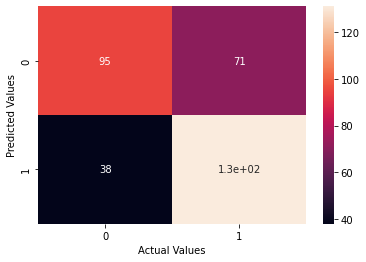

In [99]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [100]:
print(ytest[:25].values)
print(ypred[:25])

[1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1]


# Threshold Selection

In [101]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([6.95474687e-01, 6.81222965e-01, 5.56325856e-01, 6.10782665e-01,
       4.07306163e-01, 6.30436835e-01, 6.99612959e-01, 4.53074888e-01,
       6.61819654e-01, 6.68722174e-01, 5.57718915e-01, 6.13249905e-01,
       6.09440083e-01, 4.08879739e-01, 6.64473263e-01, 4.27543135e-01,
       5.66276755e-01, 5.42119411e-01, 6.45522258e-01, 6.68607233e-01,
       6.82767318e-01, 5.91165710e-01, 3.77097826e-01, 5.89589869e-01,
       5.98485988e-01, 6.36447194e-01, 7.02407491e-01, 6.22359252e-01,
       6.00387856e-01, 6.78857526e-01, 5.90164039e-01, 6.35606600e-01,
       5.59760735e-01, 2.67972615e-01, 2.49420667e-01, 6.08899659e-01,
       3.55462375e-01, 4.57404384e-01, 6.49067313e-01, 6.90488119e-01,
       6.78473920e-01, 1.30621290e-04, 5.01021195e-01, 5.29665826e-01,
       5.66088246e-01, 3.98058588e-01, 7.22772008e-01, 6.76462362e-01,
       6.23770256e-01, 5.85369463e-01, 5.74772412e-01, 6.78796820e-01,
       6.82022490e-01, 5.77717948e-01, 5.49517634e-01, 6.30350371e-01,
      

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


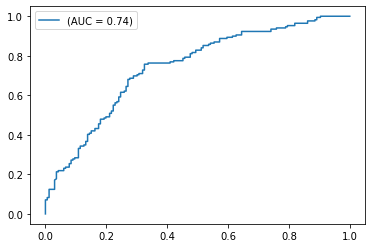

In [103]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [104]:
auc

0.7413381335994867

In [105]:
threshold

array([1.74076663e+00, 7.40766625e-01, 7.06145868e-01, 7.02407491e-01,
       7.00456742e-01, 6.99908981e-01, 6.99612959e-01, 6.91451097e-01,
       6.90488119e-01, 6.82767318e-01, 6.82022490e-01, 6.78857526e-01,
       6.78832083e-01, 6.78796820e-01, 6.77970246e-01, 6.77580106e-01,
       6.77102766e-01, 6.76462362e-01, 6.73760905e-01, 6.70247584e-01,
       6.68722174e-01, 6.68607233e-01, 6.66329653e-01, 6.66042665e-01,
       6.65820275e-01, 6.64473263e-01, 6.64250932e-01, 6.64061856e-01,
       6.55181199e-01, 6.53765992e-01, 6.50573657e-01, 6.48662511e-01,
       6.48645201e-01, 6.47910759e-01, 6.45768377e-01, 6.45697554e-01,
       6.42500783e-01, 6.42060699e-01, 6.41232062e-01, 6.37894597e-01,
       6.36103571e-01, 6.35714524e-01, 6.35225779e-01, 6.32991972e-01,
       6.30436835e-01, 6.26186526e-01, 6.23770256e-01, 6.23005163e-01,
       6.22359252e-01, 6.21547660e-01, 6.21314959e-01, 6.21017352e-01,
       6.19917892e-01, 6.18144091e-01, 6.14157064e-01, 6.13249905e-01,
      

In [106]:
len(threshold)

140

In [107]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    
final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)],axis= 1)
final_threshold.columns = ['Threshold','Accuracy']

In [110]:
final_threshold.sort_values  (by = 'Accuracy',ascending=False)

,Threshold,Accuracy
85,5.577189e-01,0.713433
84,5.579511e-01,0.713433
86,5.563259e-01,0.710448
73,5.777179e-01,0.704478
83,5.646008e-01,0.704478
...,...,...
3,7.024075e-01,0.525373
2,7.061459e-01,0.522388
139,1.081520e-15,0.507463
1,7.407666e-01,0.495522


In [111]:
from sklearn.preprocessing import binarize

In [113]:
y = binarize([proba],threshold = 0.442068)[0]
y

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [115]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60       166
           1       0.63      0.82      0.71       169

    accuracy                           0.67       335
   macro avg       0.68      0.66      0.66       335
weighted avg       0.68      0.67      0.66       335

